<a href="https://colab.research.google.com/github/dwishashah/Time-Series-Analysis/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.4 MB/s eta 0:00:00


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset (2).xls', parse_dates = True)

In [ ]:
df

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
...,...,...
558,2019-07-01,68.7391
559,2019-08-01,71.1891
560,2019-09-01,71.3110
561,2019-10-01,71.0086


Perform Exploratory Data Analysis using line, histogram and kernel density estimation (KDE) of the closing price of the stocks. EDA is the process of using a graphical representation to discover and investigate patterns within data.

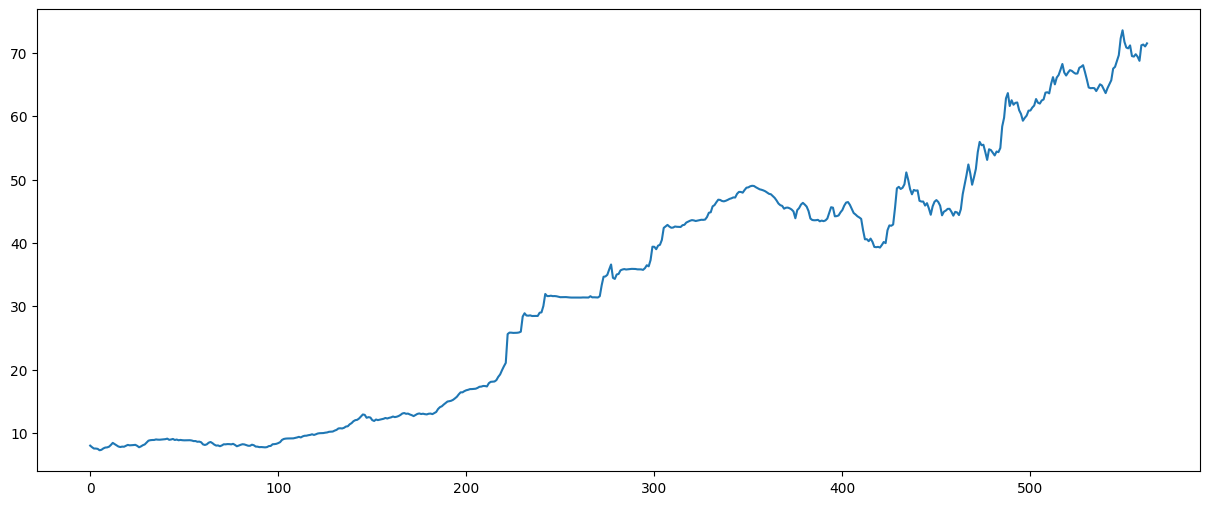

In [ ]:
df["EXINUS"].plot(figsize=(15, 6))
plt.show()

KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

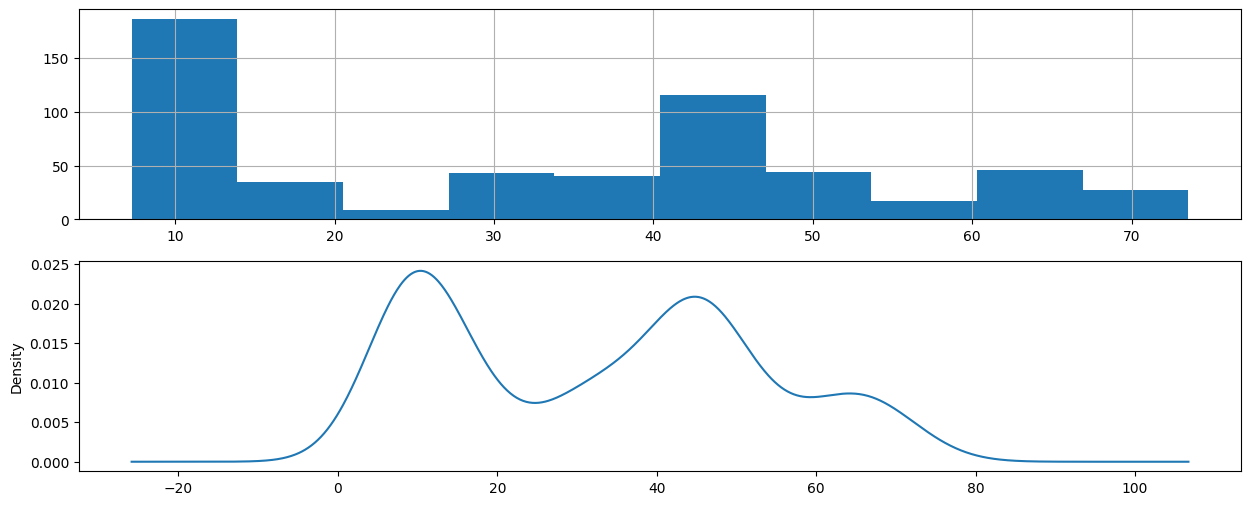

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["EXINUS"].hist()
plt.subplot(212)
df["EXINUS"].plot(kind='kde')
plt.show()

Define the TS evaluation function.

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

ADF test function to check for stationary data.

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['EXINUS' ],'EXINUS')

Results of Dickey-Fuller Test for column: EXINUS
Test Statistic                   0.805817
p-value                          0.991729
No Lags Used                    17.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Close is non-stationary and auto-arima handles this internally.

In [ ]:
X = df[['EXINUS' ]]
train, test = X[0:-30], X[-30:]

The pmdarima modeule will help us to identify p, d, q without the hassle of looking at the plot.

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=969.985, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1016.525, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=972.898, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=968.713, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1029.544, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=970.417, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=970.336, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=976.129, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.383 seconds


In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  533
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -481.357
Date:                Thu, 02 Nov 2023   AIC                            968.713
Time:                        03:32:20   BIC                            981.543
Sample:                             0   HQIC                           973.734
                                - 533                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1060      0.038      2.768      0.006       0.031       0.181
ma.L1          0.3201      0.027     11.673      0.000       0.266       0.374
sigma2         0.3575      0.010     35.929      0.000       0.338       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2461.85
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              37.34   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(530, 560)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 9.828179552294674
MSE is : 2.4903453810770126
RMSE is : 3.1349927515537694
MAPE is : 3.5448596010826687
R2 is : -0.06869548210007648



Rearrange the indexes for the plots to align.

In [ ]:
forecast["new_index"] = range(530, 560)
forecast = forecast.set_index("new_index")

Plot the results with confidence bounds.

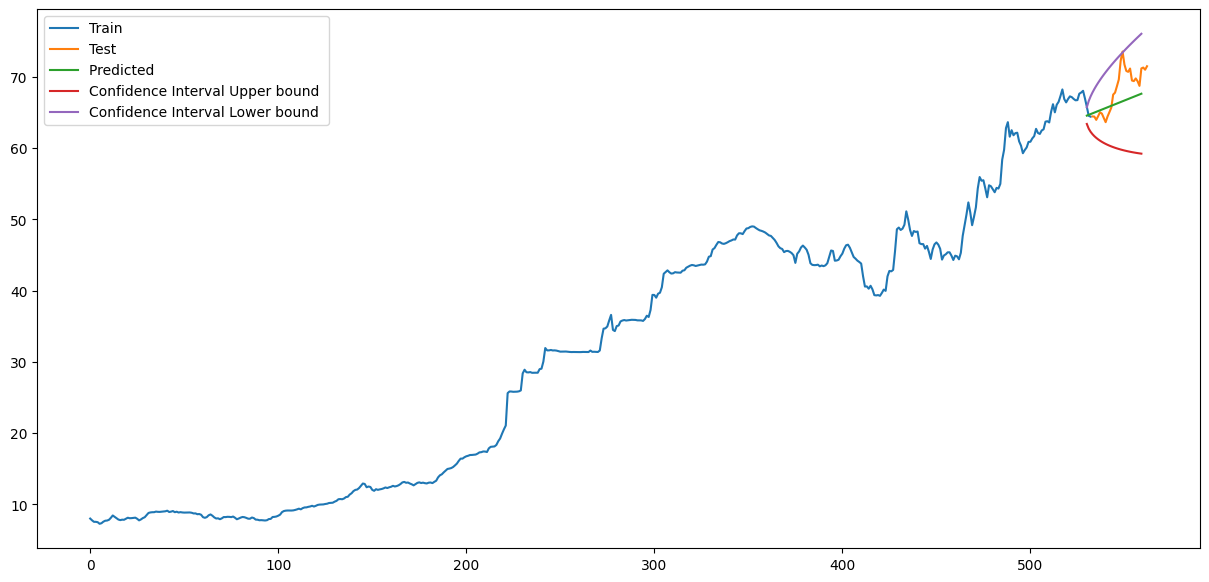

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

Plot the diagnostic Plot.

Standardized Residual: It's a measure of the strength of the difference between observed and expected values.

Histogram plus estimated density: KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

Normal Q-Q: Q-Q plots let you check that the data meet the assumption of normality. They compare the distribution of your data to a normal distribution by plotting the quartiles of your data against the quartiles of a normal distribution. If your data are normally distributed then they should form an approximately straight line.

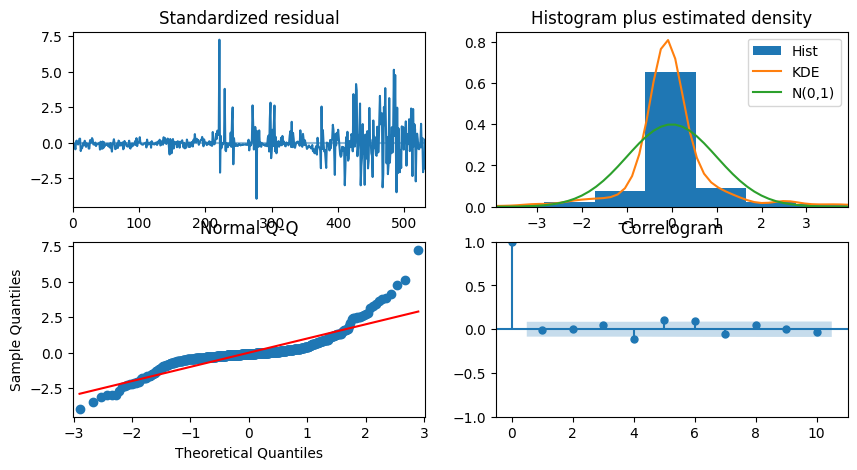

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,close_pred
new_index,
530,64.565869
531,64.671824
532,64.777780
533,64.883735
534,64.989691
535,65.095647
536,65.201602
537,65.307558
538,65.413513


In [ ]:
test

,EXINUS
533,64.4482
534,64.4240
535,63.9683
536,64.4775
537,65.0357
538,64.8435
539,64.2445
540,63.6452
541,64.4300
542,65.0455
